In [ ]:
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

DB_SCHEMA = """
Database: PostgreSQL 16 with PostGIS

Tables:
- buildings
  - bin: building id number
  - base_bbl
  - mapp_bbl
  - doitt_id
  - feat_code
  - laststatus
  - borocode
  - shape_area
  - shape_leng
  - geom
  - built_year
  - ground_ele: Ground elevation
  - heightroof
  - small_n: small neighborhood
  - small_n_a: small neighborhood abbreviation
"""

def make_user_input(query: str) -> list:
    return [
        {
            "role": "system",
            "content": "You translate natural-language questions into the most relevant column in the PostgreSQL db table: buildings."
        },
        {
            "role": "user",
            "content": f"Schema:\n{DB_SCHEMA}\n\nTask:provide exactly one word output: the column name based on the query'{query}'"
				}
    ]

def get_column_from_query():
    q = input("Query: ").strip()
    resp = client.responses.create(
        model="gpt-5-nano",
        input=make_user_input(q)
    )
    
    column = resp.output_text.strip()
    usage = resp.usage
    return {
        "column": column,
        "usage": {
            "total": usage.total_tokens,
            "input": usage.input_tokens,
            "output": usage.output_tokens
        }
    }

small_n
user query=i want to find out which place in nyc I wanna live
tokens_total=560
tokens_input=168
tokens_output=392


In [1]:
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [2]:
load_dotenv(dotenv_path="../.env")
db_url = os.getenv('db_url')
engine = create_engine(db_url)

In [37]:
gdf = gpd.read_postgis(
    sql="SELECT * FROM public.buildings WHERE large_n IN ('mid staten island', 'midtown manhattan')",
    con=engine,
    geom_col="geom"
)

gdf

,bin,base_bbl,mapp_bbl,doitt_id,feat_code,laststatus,borocode,shape_area,shape_leng,geom,...,bld_value_2024,gross_sqft,res_gross_sqft,avg_prop_value_2025,bld_story,zoning,bldg_class,avg_prop_value_2024,value_sqft_2025,value_sqft_2024
0,1013646,1007620042,1007620042,666572,2100,Constructed,1,768.390625,118.057813,"MULTIPOLYGON (((-73.99147 40.75522, -73.99178 ...",...,197866000.0,901600.0,0.0,24682750.0,23.0,M1-6,O4,24733250.0,219.012866,219.460958
1,1088826,1007620060,1007620060,1257112,2100,Constructed,1,2424.296875,201.215385,"MULTIPOLYGON (((-73.99283 40.75563, -73.99322 ...",...,195617000.0,874900.0,826900.0,48034250.0,25.0,C6-4M,D8,48904250.0,219.610241,223.587839
2,1013727,1007640031,1007640031,29207,2100,Constructed,1,269.214844,72.838955,"MULTIPOLYGON (((-74.0001 40.73912, -74.00021 4...",...,57436800.0,65000.0,51400.0,8680350.0,5.0,C6-2A,C7,7179600.0,1068.350769,883.643077
3,1081549,1007660055,1007660055,401279,2100,Constructed,1,142.343750,48.423256,"MULTIPOLYGON (((-73.99917 40.74075, -73.99922 ...",...,7052250.0,24400.0,18975.0,7198500.0,3.0,C6-2A,C5,7052250.0,295.020492,289.026639
4,1013871,1007680009,1007680009,330688,2100,Constructed,1,195.988281,63.264425,"MULTIPOLYGON (((-73.99984 40.74215, -73.99987 ...",...,30646000.0,44656.0,39456.0,4069250.0,5.0,C6-2A,C7,3830750.0,728.994984,686.268363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36892,5036677,5021620171,5021620171,416113,2100,Constructed,5,157.949219,50.655755,"MULTIPOLYGON (((-74.17774 40.60039, -74.17775 ...",...,2288000.0,4480.0,0.0,569250.0,2.0,M1-1,A2,572000.0,508.258929,510.714286
36893,5022941,5008880108,5008880108,568706,2100,Constructed,5,426.160156,88.041730,"MULTIPOLYGON (((-74.10402 40.58937, -74.10396 ...",...,12776000.0,31616.0,0.0,1716750.0,2.0,R1-1,A3,1597000.0,434.400304,404.099190
36894,5035454,5021020019,5021020019,772578,2100,Constructed,5,132.804688,49.626329,"MULTIPOLYGON (((-74.16299 40.59521, -74.16296 ...",...,4528000.0,12384.0,0.0,585000.0,2.0,R3-2,A5,566000.0,377.906977,365.633075
36895,5175042,5007010034,5007010034,1299735,2100,Constructed,5,116.777344,53.603170,"MULTIPOLYGON (((-74.11871 40.60501, -74.11872 ...",...,3730000.0,6792.0,0.0,557125.0,2.0,R3-1,A5,466250.0,656.213192,549.175501


(np.float64(2746.6666666666665), np.float64(14154627200.0))

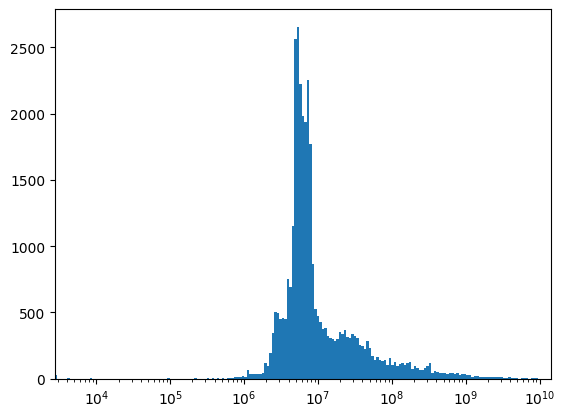

In [48]:
import numpy as np

data = gdf.loc[gdf['bld_value_2025']>0, 'bld_value_2025']

bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 200)
plt.hist(data, bins=bins)
# plt.hist(data, bins=500)

plt.xscale('log')
plt.xlim(data.min(), data.max())

In [11]:
print(gdf['heightroof'].min())
print(gdf['heightroof'].max())
print(gdf['heightroof'].mean())
print(gdf['heightroof'].median())


0.0
226.93
25.299436069815737
25.9


In [9]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import geopandas as gpd

load_dotenv(dotenv_path="../.env")

DB_URL = os.getenv("db_url")
engine = create_engine(DB_URL)

def get_data(column, neighborhood):
    if column == "there is no appropriate data for your query":
        print("no column found")
        return {
            "gdf": None,
            "error": column
        }

    try:
        sql = f"SELECT {column}, geom FROM buildings WHERE large_n = '{neighborhood}'"
        gdf = gpd.read_postgis(sql, con=engine, geom_col="geom")
        print("data retrieved from db")
        return {
            "gdf": gdf,
            "error": None
        }
    except Exception:
        print("failed to retrieve data")
        return {
            "gdf": None,
            "error": "failed to retrieve data"
        }
    
get_data("heightroof", "midtown manhattan")

data retrieved from db


{'gdf':       heightroof                                               geom
 0      42.560006  MULTIPOLYGON (((-73.99023 40.75323, -73.99039 ...
 1     150.000000  MULTIPOLYGON (((-73.98416 40.73969, -73.98431 ...
 2     153.620000  MULTIPOLYGON (((-73.97347 40.74726, -73.9735 4...
 3      59.037532  MULTIPOLYGON (((-74.00165 40.74055, -74.00165 ...
 4      54.210000  MULTIPOLYGON (((-73.96712 40.75458, -73.96721 ...
 ...          ...                                                ...
 9701   48.810000  MULTIPOLYGON (((-73.97635 40.74623, -73.97639 ...
 9702   82.000000  MULTIPOLYGON (((-73.98075 40.73471, -73.98088 ...
 9703   41.800000  MULTIPOLYGON (((-73.98062 40.73523, -73.9807 4...
 9704   41.990000  MULTIPOLYGON (((-73.98357 40.73533, -73.98367 ...
 9705   62.330000  MULTIPOLYGON (((-73.99447 40.73876, -73.99459 ...
 
 [9706 rows x 2 columns],
 'error': None}

In [4]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import geopandas as gpd

load_dotenv(dotenv_path="../.env")

DB_URL = os.getenv("db_url")
engine = create_engine(DB_URL)

sql = f"SELECT height_avg, borocode FROM street_block"
df = pd.read_sql(sql, con=engine)
df

,height_avg,borocode
0,30.035217,5
1,23.241304,5
2,24.526667,5
3,25.350052,5
4,31.878319,5
...,...,...
37375,203.820000,1
37376,NaN,1
37377,55.537845,1
37378,60.000000,1


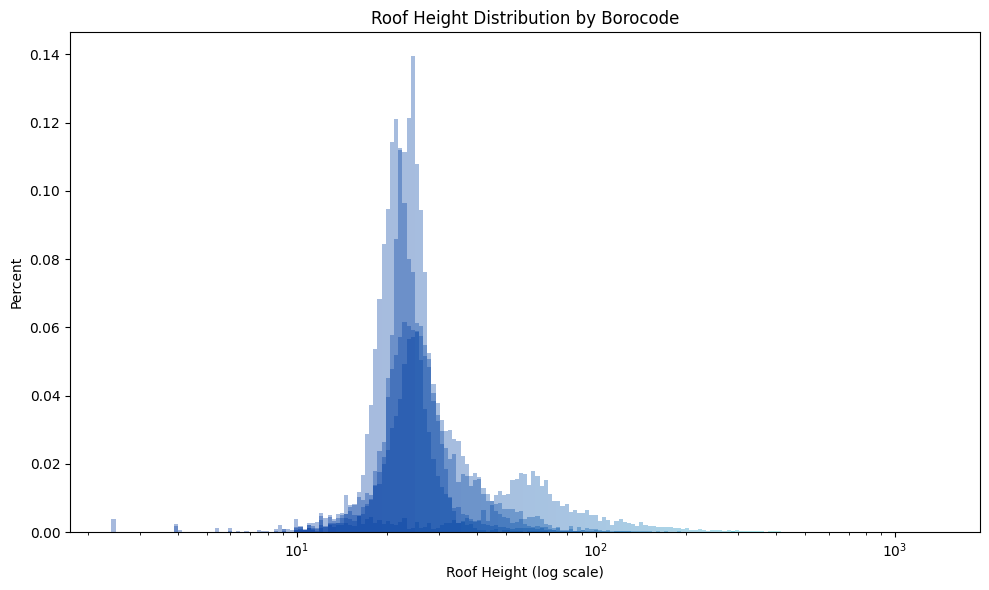

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list(
    "height_cmap",
    [
        (0.00, "#0038a0ff"),  # min
        (0.25, "#1ed3daff"),  # p25
        (0.50, "#f3e962ff"),  # median
        (0.75, "#ff7a62ff"),  # p75
        (1.00, "#e00000ff")   # max
    ]
)

def colored_hist(ax, data, bins, cmap):
    counts, bin_edges, patches = ax.hist(
        data,
        bins=bins,
        density=True,
        alpha=0.35,
        edgecolor="none"
    )

    # Normalize to 0–1 for colormap
    norm = mcolors.Normalize(vmin=bins[0], vmax=bins[-1])

    for left, patch in zip(bin_edges[:-1], patches):
        patch.set_facecolor(cmap(norm(left)))
        
df2 = df[df["height_avg"] > 0]  # log requirement
xmin = df2["height_avg"].min()
xmax = df2["height_avg"].max()
bins = np.logspace(np.log10(xmin), np.log10(xmax), 200)

plt.figure(figsize=(10,6))

for b in [1,2,3,4,5]:
    g = df2[df2["borocode"] == b]["height_avg"].dropna()
    colored_hist(plt.gca(), g, bins, cmap)

plt.xscale("log")
plt.xlabel("Roof Height (log scale)")
plt.ylabel("Percent")
plt.title("Roof Height Distribution by Borocode")
plt.tight_layout()
plt.show()